# Step 4: Analyze Words in Spanish Songs (Test Dataset)

##### Descriptive Statistics on Lyrics

First, find the following to understand data:
    - Uppercase words
    - Numerics
    - Word Count
    - Unique word count
    - Character count
    - Average word per sentence (update by song?)

In [6]:
import pandas as pd
lyrics = pd.read_excel("lyrics.xlsx")
lyrics

,Singer,Song-name,Lyrics,Songwriters
0,J Balvin,Ambiente,Tengo la necesidad de saber lo que piensas\nCu...,Alejandro Ramirez Suarez / John Savas / Jose O...
1,J Balvin,Ahora,"Quédate aquí, te conviene\nVamo' a dejar que e...",Alejandro Ramirez Suarez / Jhay Cortez / Jose ...
2,Karol G,Pineapple,"Ella, ella, ella\nAh-ah-ah-ahh\n\nPréndelo y a...",Alejandro Ramirez Suarez / Carolina Giraldo Na...
3,"Karol G, J Balvin",Mi Cama,"Ah, o-oh, oh, oh\nDices que de mí ya te olvida...",Andy Clay / Antonio Rayo Gibo / Carolina Giral...


In [7]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

lyrics['upper'] = lyrics['Lyrics'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
lyrics['numerics'] = lyrics['Lyrics'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
lyrics['word_count'] = lyrics['Lyrics'].apply(lambda x: len(str(x).split(" ")))
lyrics['unique word_count'] = lyrics['Lyrics'].apply(lambda x: len(set(str(x).split(" "))))
lyrics['char_count'] = lyrics['Lyrics'].str.len()
lyrics['avg_word'] = lyrics['Lyrics'].apply(lambda x: avg_word(x))
lyrics.head()

,Singer,Song-name,Lyrics,Songwriters,upper,numerics,word_count,unique word_count,char_count,avg_word
0,J Balvin,Ambiente,Tengo la necesidad de saber lo que piensas\nCu...,Alejandro Ramirez Suarez / John Savas / Jose O...,12,0,410,156,2429,4.006211
1,J Balvin,Ahora,"Quédate aquí, te conviene\nVamo' a dejar que e...",Alejandro Ramirez Suarez / Jhay Cortez / Jose ...,4,0,378,144,2477,4.298925
2,Karol G,Pineapple,"Ella, ella, ella\nAh-ah-ah-ahh\n\nPréndelo y a...",Alejandro Ramirez Suarez / Carolina Giraldo Na...,3,0,301,82,1773,4.063037
3,"Karol G, J Balvin",Mi Cama,"Ah, o-oh, oh, oh\nDices que de mí ya te olvida...",Andy Clay / Antonio Rayo Gibo / Carolina Giral...,7,0,192,109,1097,3.776316


In [8]:
#clean data
lyrics['Lyrics_clean'] = lyrics['Lyrics'].apply(lambda x: " ".join(x.lower() for x in x.split())) #lower case
lyrics['Lyrics_clean'] = lyrics['Lyrics_clean'].str.replace('[^\w\s]','') #removes punctuation
lyrics.head()

,Singer,Song-name,Lyrics,Songwriters,upper,numerics,word_count,unique word_count,char_count,avg_word,Lyrics_clean
0,J Balvin,Ambiente,Tengo la necesidad de saber lo que piensas\nCu...,Alejandro Ramirez Suarez / John Savas / Jose O...,12,0,410,156,2429,4.006211,tengo la necesidad de saber lo que piensas cua...
1,J Balvin,Ahora,"Quédate aquí, te conviene\nVamo' a dejar que e...",Alejandro Ramirez Suarez / Jhay Cortez / Jose ...,4,0,378,144,2477,4.298925,quédate aquí te conviene vamo a dejar que esto...
2,Karol G,Pineapple,"Ella, ella, ella\nAh-ah-ah-ahh\n\nPréndelo y a...",Alejandro Ramirez Suarez / Carolina Giraldo Na...,3,0,301,82,1773,4.063037,ella ella ella ahahahahh préndelo y apágalo ve...
3,"Karol G, J Balvin",Mi Cama,"Ah, o-oh, oh, oh\nDices que de mí ya te olvida...",Andy Clay / Antonio Rayo Gibo / Carolina Giral...,7,0,192,109,1097,3.776316,ah ooh oh oh dices que de mí ya te olvidaste y...


In [105]:
#total word count
freq = pd.Series(' '.join(lyrics['Lyrics_clean']).split()).value_counts()
freq #342 words in 4 songs

que            97
me             44
y              44
te             39
no             36
lo             32
yo             31
tú             29
si             28
a              24
de             24
ahora          21
la             20
cuando         19
tu             19
ya             18
las            18
por            17
suena          16
pom            16
sé             15
mi             14
en             13
se             13
tocar          13
le             13
quieres        13
prefieres      12
mí             12
skrt           12
               ..
nos             1
cien            1
guerra          1
entré           1
qué             1
carteras        1
quedé           1
acabar          1
bajas           1
pusiste         1
dos             1
pasado          1
pasarlo         1
interesante     1
solo            1
subiste         1
hora            1
cosa            1
fanático        1
desde           1
puso            1
empezó          1
estamos         1
hot             1
confianza 

In [106]:
freq.to_excel("Total_Words.xlsx", sheet_name="Sheet1", index=True)

##### SpaCy Parts of Speech Tagger

Next, separate the lyrics into various parts of speech using natural language processing:
    - Nouns and proper nouns
    - Verbs and auxiliary verbs
    - Pronouns
    - Stop words, including ADT and DET
    - Conj and Sconj 
    - Adjectives and adverbs

In [10]:
words = pd.DataFrame(lyrics['Lyrics_clean'])
words.columns = ['Lyrics_clean']
words

,Lyrics_clean
0,tengo la necesidad de saber lo que piensas cua...
1,quédate aquí te conviene vamo a dejar que esto...
2,ella ella ella ahahahahh préndelo y apágalo ve...
3,ah ooh oh oh dices que de mí ya te olvidaste y...


In [ ]:
import spacy
nlp = spacy.load("es")

In [33]:
from spacy.displacy.render import EntityRenderer
from IPython.core.display import display, HTML

def custom_render(doc, words, column, options={}, page=False, minify=False, idx=0):
    
    renderer, converter = EntityRenderer, parse_custom_ents
    renderer = renderer(options=options)
    parsed = [converter(doc, words=words, idx=idx, column=column)]
    html = renderer.render(parsed, page=page, minify=minify).strip()  
    return display(HTML(html))

def parse_custom_ents(doc, words, idx, column):
    
    if column in words.columns:
        entities = words[column][idx]
        ents = [{'start': ent[1], 'end': ent[2], 'label': ent[3]} 
                for ent in entities]
    else:
        ents = [{'start': ent.start_char, 'end': ent.end_char, 'label': ent.label_}
            for ent in doc.ents]
    return {'text': doc.text, 'ents': ents, 'title': None}

def render_entities(idx, words, options={}, column='named_ents'):
    
    text = words['Lyrics_clean'][idx]
    custom_render(nlp(text), words=words, column=column, options=options, idx=idx)

In [34]:
options = {
    'colors': {'VERB': '#FE6BFE', 'AUX': '#FE6BFE', 'PROPN': '#18CFE6', 'NOUN': '#18CFE6', 'PRON': '#1EECA6', 'DET': '#FF8800', 'ADP': '#FF8800'}
}

In [35]:
def extract_nouns(text):   
    keep_pos = ['PROPN', 'NOUN']
    return [(tok.text, tok.idx, tok.idx+len(tok.text), tok.pos_) for tok in nlp(text) if tok.pos_ in keep_pos]

def add_nouns(words):
    words['nouns'] = words['Lyrics_clean'].apply(extract_nouns)

In [36]:
add_nouns(words)
display(words)

,Lyrics_clean,nouns
0,tengo la necesidad de saber lo que piensas cua...,"[(necesidad, 9, 18, NOUN), (intimidad, 70, 79,..."
1,quédate aquí te conviene vamo a dejar que esto...,"[(vamo, 25, 29, NOUN), (guerra, 150, 156, NOUN..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[(préndelo, 25, 33, NOUN), (apágalo, 36, 43, N..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[(oh, 7, 9, PROPN), (oh, 10, 12, PROPN), (dice..."


In [37]:
column = 'nouns'
render_entities(0, words, options=options, column=column)

In [38]:
def extract_verbs(text):
    keep_pos = ['VERB', 'AUX']
    return [(tok.text, tok.idx, tok.idx+len(tok.text), tok.pos_) for tok in nlp(text) if tok.pos_ in keep_pos]

def add_verbs(words):
    words['verbs'] = words['Lyrics_clean'].apply(extract_verbs)

In [39]:
add_verbs(words)
display(words)

,Lyrics_clean,nouns,verbs
0,tengo la necesidad de saber lo que piensas cua...,"[(necesidad, 9, 18, NOUN), (intimidad, 70, 79,...","[(tengo, 0, 5, VERB), (saber, 22, 27, VERB), (..."
1,quédate aquí te conviene vamo a dejar que esto...,"[(vamo, 25, 29, NOUN), (guerra, 150, 156, NOUN...","[(quédate, 0, 7, VERB), (conviene, 16, 24, VER..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[(préndelo, 25, 33, NOUN), (apágalo, 36, 43, N...","[(ven, 44, 47, VERB), (vi, 64, 66, VERB), (es,..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[(oh, 7, 9, PROPN), (oh, 10, 12, PROPN), (dice...","[(ah, 0, 2, VERB), (ooh, 3, 6, VERB), (olvidas..."


In [40]:
column = 'verbs'
render_entities(0, words, options=options, column=column)

In [41]:
def extract_pronoun(text):
    keep_pos = ['PRON']
    return [(tok.text, tok.idx, tok.idx+len(tok.text), tok.pos_) for tok in nlp(text) if tok.pos_ in keep_pos]

def add_pronoun(words):
    words['pronoun'] = words['Lyrics_clean'].apply(extract_pronoun)

In [42]:
add_pronoun(words)
display(words)

,Lyrics_clean,nouns,verbs,pronoun
0,tengo la necesidad de saber lo que piensas cua...,"[(necesidad, 9, 18, NOUN), (intimidad, 70, 79,...","[(tengo, 0, 5, VERB), (saber, 22, 27, VERB), (...","[(que, 31, 34, PRON), (mí, 61, 63, PRON), (me,..."
1,quédate aquí te conviene vamo a dejar que esto...,"[(vamo, 25, 29, NOUN), (guerra, 150, 156, NOUN...","[(quédate, 0, 7, VERB), (conviene, 16, 24, VER...","[(te, 13, 15, PRON), (esto, 42, 46, PRON), (tú..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[(préndelo, 25, 33, NOUN), (apágalo, 36, 43, N...","[(ven, 44, 47, VERB), (vi, 64, 66, VERB), (es,...","[(ella, 0, 4, PRON), (ella, 5, 9, PRON), (ella..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[(oh, 7, 9, PROPN), (oh, 10, 12, PROPN), (dice...","[(ah, 0, 2, VERB), (ooh, 3, 6, VERB), (olvidas...","[(que, 19, 22, PRON), (mí, 26, 28, PRON), (te,..."


In [43]:
column = 'pronoun'
render_entities(0, words, options=options, column=column)

In [44]:
def extract_stopwords(text):
    keep_pos = ['DET', 'ADP']
    return [(tok.text, tok.idx, tok.idx+len(tok.text), tok.pos_) for tok in nlp(text) if tok.pos_ in keep_pos]

def add_stopwords(words):
    words['stopwords'] = words['Lyrics_clean'].apply(extract_stopwords)

In [45]:
add_stopwords(words)
display(words)

,Lyrics_clean,nouns,verbs,pronoun,stopwords
0,tengo la necesidad de saber lo que piensas cua...,"[(necesidad, 9, 18, NOUN), (intimidad, 70, 79,...","[(tengo, 0, 5, VERB), (saber, 22, 27, VERB), (...","[(que, 31, 34, PRON), (mí, 61, 63, PRON), (me,...","[(la, 6, 8, DET), (de, 19, 21, ADP), (lo, 28, ..."
1,quédate aquí te conviene vamo a dejar que esto...,"[(vamo, 25, 29, NOUN), (guerra, 150, 156, NOUN...","[(quédate, 0, 7, VERB), (conviene, 16, 24, VER...","[(te, 13, 15, PRON), (esto, 42, 46, PRON), (tú...","[(a, 30, 31, ADP), (de, 102, 104, ADP), (lo, 1..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[(préndelo, 25, 33, NOUN), (apágalo, 36, 43, N...","[(ven, 44, 47, VERB), (vi, 64, 66, VERB), (es,...","[(ella, 0, 4, PRON), (ella, 5, 9, PRON), (ella...","[(de, 126, 128, ADP), (las, 143, 146, DET), (d..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[(oh, 7, 9, PROPN), (oh, 10, 12, PROPN), (dice...","[(ah, 0, 2, VERB), (ooh, 3, 6, VERB), (olvidas...","[(que, 19, 22, PRON), (mí, 26, 28, PRON), (te,...","[(de, 23, 25, ADP), (de, 47, 49, ADP), (tu, 50..."


In [46]:
column = 'stopwords'
render_entities(0, words, options=options, column=column)

In [47]:
def extract_conj(text):
    keep_pos = ['CONJ', 'SCONJ']
    return [(tok.text, tok.idx, tok.idx+len(tok.text), tok.pos_) for tok in nlp(text) if tok.pos_ in keep_pos]

def add_conj(words):
    words['conjs'] = words['Lyrics_clean'].apply(extract_conj)

In [48]:
add_conj(words)
display(words)

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs
0,tengo la necesidad de saber lo que piensas cua...,"[(necesidad, 9, 18, NOUN), (intimidad, 70, 79,...","[(tengo, 0, 5, VERB), (saber, 22, 27, VERB), (...","[(que, 31, 34, PRON), (mí, 61, 63, PRON), (me,...","[(la, 6, 8, DET), (de, 19, 21, ADP), (lo, 28, ...","[(cuando, 43, 49, SCONJ), (que, 95, 98, SCONJ)..."
1,quédate aquí te conviene vamo a dejar que esto...,"[(vamo, 25, 29, NOUN), (guerra, 150, 156, NOUN...","[(quédate, 0, 7, VERB), (conviene, 16, 24, VER...","[(te, 13, 15, PRON), (esto, 42, 46, PRON), (tú...","[(a, 30, 31, ADP), (de, 102, 104, ADP), (lo, 1...","[(que, 38, 41, SCONJ), (y, 52, 53, CONJ), (mie..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[(préndelo, 25, 33, NOUN), (apágalo, 36, 43, N...","[(ven, 44, 47, VERB), (vi, 64, 66, VERB), (es,...","[(ella, 0, 4, PRON), (ella, 5, 9, PRON), (ella...","[(de, 126, 128, ADP), (las, 143, 146, DET), (d...","[(y, 34, 35, CONJ), (que, 76, 79, SCONJ), (y, ..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[(oh, 7, 9, PROPN), (oh, 10, 12, PROPN), (dice...","[(ah, 0, 2, VERB), (ooh, 3, 6, VERB), (olvidas...","[(que, 19, 22, PRON), (mí, 26, 28, PRON), (te,...","[(de, 23, 25, ADP), (de, 47, 49, ADP), (tu, 50...","[(y, 45, 46, CONJ), (cuando, 68, 74, SCONJ), (..."


In [49]:
column = 'conjs'
render_entities(0, words, options=options, column=column)

In [50]:
def extract_ads(text):
    keep_pos = ['ADJ', 'ADV']
    return [(tok.text, tok.idx, tok.idx+len(tok.text), tok.pos_) for tok in nlp(text) if tok.pos_ in keep_pos]

def add_ads(words):
    words['ads'] = words['Lyrics_clean'].apply(extract_ads)

In [51]:
add_ads(words)
display(words)

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads
0,tengo la necesidad de saber lo que piensas cua...,"[(necesidad, 9, 18, NOUN), (intimidad, 70, 79,...","[(tengo, 0, 5, VERB), (saber, 22, 27, VERB), (...","[(que, 31, 34, PRON), (mí, 61, 63, PRON), (me,...","[(la, 6, 8, DET), (de, 19, 21, ADP), (lo, 28, ...","[(cuando, 43, 49, SCONJ), (que, 95, 98, SCONJ)...","[(no, 99, 101, ADV), (no, 193, 195, ADV), (pre..."
1,quédate aquí te conviene vamo a dejar que esto...,"[(vamo, 25, 29, NOUN), (guerra, 150, 156, NOUN...","[(quédate, 0, 7, VERB), (conviene, 16, 24, VER...","[(te, 13, 15, PRON), (esto, 42, 46, PRON), (tú...","[(a, 30, 31, ADP), (de, 102, 104, ADP), (lo, 1...","[(que, 38, 41, SCONJ), (y, 52, 53, CONJ), (mie...","[(aquí, 8, 12, ADV), (fanático, 93, 101, ADJ),..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[(préndelo, 25, 33, NOUN), (apágalo, 36, 43, N...","[(ven, 44, 47, VERB), (vi, 64, 66, VERB), (es,...","[(ella, 0, 4, PRON), (ella, 5, 9, PRON), (ella...","[(de, 126, 128, ADP), (las, 143, 146, DET), (d...","[(y, 34, 35, CONJ), (que, 76, 79, SCONJ), (y, ...","[(ahahahahh, 15, 24, ADV), (ya, 61, 63, ADV), ..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[(oh, 7, 9, PROPN), (oh, 10, 12, PROPN), (dice...","[(ah, 0, 2, VERB), (ooh, 3, 6, VERB), (olvidas...","[(que, 19, 22, PRON), (mí, 26, 28, PRON), (te,...","[(de, 23, 25, ADP), (de, 47, 49, ADP), (tu, 50...","[(y, 45, 46, CONJ), (cuando, 68, 74, SCONJ), (...","[(ya, 29, 31, ADV), (borraste, 59, 67, ADJ), (..."


In [52]:
column = 'ads'
render_entities(0, words, options=options, column=column)

In [53]:
words.to_excel("words.xlsx", sheet_name="Sheet1", index=True)
words

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads
0,tengo la necesidad de saber lo que piensas cua...,"[(necesidad, 9, 18, NOUN), (intimidad, 70, 79,...","[(tengo, 0, 5, VERB), (saber, 22, 27, VERB), (...","[(que, 31, 34, PRON), (mí, 61, 63, PRON), (me,...","[(la, 6, 8, DET), (de, 19, 21, ADP), (lo, 28, ...","[(cuando, 43, 49, SCONJ), (que, 95, 98, SCONJ)...","[(no, 99, 101, ADV), (no, 193, 195, ADV), (pre..."
1,quédate aquí te conviene vamo a dejar que esto...,"[(vamo, 25, 29, NOUN), (guerra, 150, 156, NOUN...","[(quédate, 0, 7, VERB), (conviene, 16, 24, VER...","[(te, 13, 15, PRON), (esto, 42, 46, PRON), (tú...","[(a, 30, 31, ADP), (de, 102, 104, ADP), (lo, 1...","[(que, 38, 41, SCONJ), (y, 52, 53, CONJ), (mie...","[(aquí, 8, 12, ADV), (fanático, 93, 101, ADJ),..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[(préndelo, 25, 33, NOUN), (apágalo, 36, 43, N...","[(ven, 44, 47, VERB), (vi, 64, 66, VERB), (es,...","[(ella, 0, 4, PRON), (ella, 5, 9, PRON), (ella...","[(de, 126, 128, ADP), (las, 143, 146, DET), (d...","[(y, 34, 35, CONJ), (que, 76, 79, SCONJ), (y, ...","[(ahahahahh, 15, 24, ADV), (ya, 61, 63, ADV), ..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[(oh, 7, 9, PROPN), (oh, 10, 12, PROPN), (dice...","[(ah, 0, 2, VERB), (ooh, 3, 6, VERB), (olvidas...","[(que, 19, 22, PRON), (mí, 26, 28, PRON), (te,...","[(de, 23, 25, ADP), (de, 47, 49, ADP), (tu, 50...","[(y, 45, 46, CONJ), (cuando, 68, 74, SCONJ), (...","[(ya, 29, 31, ADV), (borraste, 59, 67, ADJ), (..."


Resource/Code Citation:
    - https://www.kaggle.com/sudosharma/quick-and-dirty-entity-extractions

# Step 5: Lists Parts of Speech - Frequency Counts - Display in WordClouds

In [1]:
import pandas as pd
df = pd.read_excel('words.xlsx', sheet_name='Sheet1')
df.head(10)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,text,nouns,verbs,pronoun,stopwords
0,tengo la necesidad de saber lo que piensas\ncu...,"[('necesidad', 9, 18, 'NOUN'), ('intimidad', 7...","[('tengo', 0, 5, 'VERB'), ('saber', 22, 27, 'V...","[('que', 31, 34, 'PRON'), ('mí', 61, 63, 'PRON...","[('la', 6, 8, 'DET'), ('de', 19, 21, 'ADP'), (..."
1,"quédate aquí, te conviene\nvamo' a dejar que e...","[('quédate', 0, 7, 'NOUN'), ('vamo', 26, 30, '...","[('conviene', 17, 25, 'VERB'), ('pase', 49, 53...","[('te', 14, 16, 'PRON'), ('esto', 44, 48, 'PRO...","[('a', 32, 33, 'ADP'), ('de', 105, 107, 'ADP')..."
2,"ella, ella, ella\nah-ah-ah-ahh\n\npréndelo y a...","[('ahh', 26, 29, 'NOUN'), ('préndelo', 31, 39,...","[('ah', 17, 19, 'VERB'), ('ven', 50, 53, 'VERB...","[('ella', 0, 4, 'PRON'), ('ella', 6, 10, 'PRON...","[('de', 133, 135, 'ADP'), ('las', 150, 153, 'D..."
3,"ah, o-oh, oh, oh\ndices que de mí ya te olvida...","[('dices', 17, 22, 'NOUN'), ('mente', 57, 62, ...","[('olvidaste', 39, 48, 'VERB'), ('borraste', 6...","[('que', 23, 26, 'PRON'), ('mí', 30, 32, 'PRON...","[('oh', 14, 16, 'ADP'), ('de', 27, 29, 'ADP'),..."


##### WordCloud of All Songs

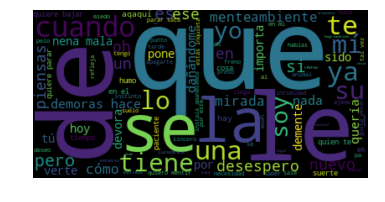

In [61]:
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt

raw_str = df.loc[0].str.cat(sep=',')
wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Clean Dataset

In [57]:
df["nouns"] = df['nouns'].str.replace('\d+', '')
df["verbs"] = df['verbs'].str.replace('\d+', '')
df["pronoun"] = df['pronoun'].str.replace('\d+', '')
df["stopwords"] = df['stopwords'].str.replace('\d+', '')
df["conjs"] = df['conjs'].str.replace('\d+', '')
df["ads"] = df['ads'].str.replace('\d+', '')
df

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads
0,tengo la necesidad de saber lo que piensas cua...,"[('necesidad', , , 'NOUN'), ('intimidad', , , ...","[('tengo', , , 'VERB'), ('saber', , , 'VERB'),...","[('que', , , 'PRON'), ('mí', , , 'PRON'), ('me...","[('la', , , 'DET'), ('de', , , 'ADP'), ('lo', ...","[('cuando', , , 'SCONJ'), ('que', , , 'SCONJ')...","[('no', , , 'ADV'), ('no', , , 'ADV'), ('preso..."
1,quédate aquí te conviene vamo a dejar que esto...,"[('vamo', , , 'NOUN'), ('guerra', , , 'NOUN'),...","[('quédate', , , 'VERB'), ('conviene', , , 'VE...","[('te', , , 'PRON'), ('esto', , , 'PRON'), ('t...","[('a', , , 'ADP'), ('de', , , 'ADP'), ('lo', ,...","[('que', , , 'SCONJ'), ('y', , , 'CONJ'), ('mi...","[('aquí', , , 'ADV'), ('fanático', , , 'ADJ'),..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[('préndelo', , , 'NOUN'), ('apágalo', , , 'NO...","[('ven', , , 'VERB'), ('vi', , , 'VERB'), ('es...","[('ella', , , 'PRON'), ('ella', , , 'PRON'), (...","[('de', , , 'ADP'), ('las', , , 'DET'), ('de',...","[('y', , , 'CONJ'), ('que', , , 'SCONJ'), ('y'...","[('ahahahahh', , , 'ADV'), ('ya', , , 'ADV'), ..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[('oh', , , 'PROPN'), ('oh', , , 'PROPN'), ('d...","[('ah', , , 'VERB'), ('ooh', , , 'VERB'), ('ol...","[('que', , , 'PRON'), ('mí', , , 'PRON'), ('te...","[('de', , , 'ADP'), ('de', , , 'ADP'), ('tu', ...","[('y', , , 'CONJ'), ('cuando', , , 'SCONJ'), (...","[('ya', , , 'ADV'), ('borraste', , , 'ADJ'), (..."


In [58]:
df["nouns"] = df['nouns'].str.replace('NOUN', '')
df["nouns"] = df['nouns'].str.replace('PROPN', '')
df["verbs"] = df['verbs'].str.replace('VERB', '')
df["verbs"] = df['verbs'].str.replace('AUX', '')
df["pronoun"] = df['pronoun'].str.replace('PRON', '')
df["stopwords"] = df['stopwords'].str.replace('ADP', '')
df["stopwords"] = df['stopwords'].str.replace('DET', '')
df["conjs"] = df['conjs'].str.replace('CONJ', '')
df["conjs"] = df['conjs'].str.replace('SCONJ', '')
df["ads"] = df['ads'].str.replace('ADJ', '')
df["ads"] = df['ads'].str.replace('ADV', '')
df

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads
0,tengo la necesidad de saber lo que piensas cua...,"[('necesidad', , , ''), ('intimidad', , , ''),...","[('tengo', , , ''), ('saber', , , ''), ('piens...","[('que', , , ''), ('mí', , , ''), ('me', , , '...","[('la', , , ''), ('de', , , ''), ('lo', , , ''...","[('cuando', , , 'S'), ('que', , , 'S'), ('y', ...","[('no', , , ''), ('no', , , ''), ('preso', , ,..."
1,quédate aquí te conviene vamo a dejar que esto...,"[('vamo', , , ''), ('guerra', , , ''), ('podem...","[('quédate', , , ''), ('conviene', , , ''), ('...","[('te', , , ''), ('esto', , , ''), ('tú', , , ...","[('a', , , ''), ('de', , , ''), ('lo', , , '')...","[('que', , , 'S'), ('y', , , ''), ('mientras',...","[('aquí', , , ''), ('fanático', , , ''), ('aqu..."
2,ella ella ella ahahahahh préndelo y apágalo ve...,"[('préndelo', , , ''), ('apágalo', , , ''), ('...","[('ven', , , ''), ('vi', , , ''), ('es', , , '...","[('ella', , , ''), ('ella', , , ''), ('ella', ...","[('de', , , ''), ('las', , , ''), ('de', , , '...","[('y', , , ''), ('que', , , 'S'), ('y', , , ''...","[('ahahahahh', , , ''), ('ya', , , ''), ('obvi..."
3,ah ooh oh oh dices que de mí ya te olvidaste y...,"[('oh', , , ''), ('oh', , , ''), ('dices', , ,...","[('ah', , , ''), ('ooh', , , ''), ('olvidaste'...","[('que', , , ''), ('mí', , , ''), ('te', , , '...","[('de', , , ''), ('de', , , ''), ('tu', , , ''...","[('y', , , ''), ('cuando', , , 'S'), ('que', ,...","[('ya', , , ''), ('borraste', , , ''), ('tranq..."


In [59]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df["nouns"] = df['nouns'].apply(remove_punctuations)
df["verbs"] = df['verbs'].apply(remove_punctuations)
df["pronoun"] = df['pronoun'].apply(remove_punctuations)
df["stopwords"] = df['stopwords'].apply(remove_punctuations)
df["conjs"] = df['conjs'].apply(remove_punctuations)
df["ads"] = df['ads'].apply(remove_punctuations)
df

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads
0,tengo la necesidad de saber lo que piensas cua...,necesidad intimidad cosas pelo sue...,tengo saber piensas piensas conven...,que mí me me que me mí mí...,la de lo en en la de de ...,cuando S que S y pero cuando S y ...,no no preso aqaquí paciente hoy...
1,quédate aquí te conviene vamo a dejar que esto...,vamo guerra podemo pases horas ...,quédate conviene dejar pase entret...,te esto tú te yo me que t...,a de lo las las todo lo t...,que S y mientras S si S que S cuand...,aquí fanático aquí tenerte ahora ...
2,ella ella ella ahahahahh préndelo y apágalo ve...,préndelo apágalo dímelo cosas imag...,ven vi es hacer hablan sé es...,ella ella ella ay yo tú te ...,de las de las la la lo to...,y que S y cuando S que S y cuan...,ahahahahh ya obvio quieres ya o...
3,ah ooh oh oh dices que de mí ya te olvidaste y...,oh oh dices mente piensas fila ...,ah ooh olvidaste hacía pom pom ...,que mí te yo te yo me los...,de de tu tu mi mi en mi ...,y cuando S que S y mientras que ...,ya borraste tranquila suena suena ...


In [107]:
freq = pd.Series(' '.join(df['Lyrics_clean']).split()).value_counts()
freq.head(20) #20 most common words

que       97
me        44
y         44
te        39
no        36
lo        32
yo        31
tú        29
si        28
a         24
de        24
ahora     21
la        20
cuando    19
tu        19
ya        18
las       18
por       17
suena     16
pom       16
dtype: int64

In [68]:
noun_freq = pd.Series(' '.join(df['nouns']).split()).value_counts()
noun_freq #96 nouns total

cama         11
horas         7
pídeme        7
solas         6
actitud       6
cuerpo        6
oh            6
skrt          6
quieres       5
cosas         5
mente         5
oscuridad     5
tiempo        5
vez           4
prefieres     4
mirada        3
señales       3
ambiente      3
imaginas      3
verte         3
dímelo        3
luz           3
hacerte       3
humo          3
suerte        3
suelo         3
necesidad     2
veneno        2
punto         2
vas           2
             ..
piensas       1
ojos          1
apágalo       1
tainy         1
vamo          1
vida          1
hora          1
podemo        1
pasarlo       1
pena          1
pases         1
tren          1
bebé          1
par           1
recuerdo      1
muchachos     1
sugiero       1
depresión     1
pom           1
fila          1
pasaje        1
vuelo         1
sky           1
dm            1
presiento     1
cerradura     1
nivel         1
noche         1
copa          1
diabla        1
Length: 96, dtype: int64

In [70]:
verb_freq = pd.Series(' '.join(df['verbs']).split()).value_counts()
verb_freq #149 verbs

sé             15
tocar          13
hay            10
quiero         10
ver             9
es              9
demoras         9
suena           8
prefieres       8
quiera          8
sabes           7
son             7
vo              6
eh              6
contestar       6
mata            6
llamó           6
estamo          6
creo            6
quiere          6
hacer           5
quieres         5
hace            5
soy             5
puedes          5
estás           4
desespero       4
rompiendo       4
tiene           4
tienes          4
               ..
quedé           1
acabar          1
damos           1
inventas        1
puso            1
soltaba         1
comprarme       1
pasado          1
juraba          1
estamos         1
ha              1
ieheheheheh     1
damo            1
creas           1
entregaba       1
estalló         1
pasó            1
haciendo        1
terminar        1
podemo          1
empezó          1
era             1
apague          1
encontrar       1
espero    

In [72]:
pronoun_freq = pd.Series(' '.join(df['pronoun']).split()).value_counts()[:50]
pronoun_freq #returns 24

me         44
que        40
te         39
yo         31
tú         29
le         13
se         13
mí         12
lo          6
cómo        5
ella        4
nada        3
quien       3
conmigo     3
todo        2
ay          1
qué         1
otra        1
esto        1
eh          1
eso         1
ti          1
los         1
nos         1
dtype: int64

In [73]:
stop_freq = pd.Series(' '.join(df['stopwords']).split()).value_counts()[:50]
stop_freq #returns 29

lo        26
a         24
de        24
la        20
tu        19
las       18
por       17
mi        14
en        13
todo       8
tantas     7
pa         7
una        7
un         6
su         6
el         6
con        5
ese        4
hasta      4
otra       3
este       3
todas      3
sin        2
para       2
al         2
esta       1
desde      1
j          1
esa        1
dtype: int64

In [77]:
conj_freq = pd.Series(' '.join(df['conjs']).split()).value_counts()[:50]
conj_freq #returns 13 -> cut out single letter

S           115
que          57
y            44
si           28
cuando       19
pero          9
porque        7
ni            3
como          2
mientras      2
aunque        1
o             1
j             1
dtype: int64

In [79]:
ads_freq = pd.Series(' '.join(df['ads']).split()).value_counts()
ads_freq #returns 50

no             36
ahora          21
ya             18
suena           8
después         8
sí              6
skrt            6
ignoras         6
tenerte         6
hoy             6
vente           5
así             5
nuevo           4
bien            4
mala            4
nena            4
quieres         3
demente         3
baby            3
aqaquí          3
obvio           3
más             3
yeah            3
paciente        3
siempre         3
aquí            3
encima          2
dime            2
animal          2
preso           2
tan             2
mal             2
tarde           2
wuh             2
borraste        2
ajeno           2
casi            2
disfraces       1
pensaste        1
ahahahahh       1
malo            1
solo            1
ahí             1
interesante     1
yep             1
fanático        1
también         1
caigo           1
tranquila       1
sola            1
dtype: int64

##### Lemmatization of Verbs

In [84]:
df

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads
0,tengo la necesidad de saber lo que piensas cua...,necesidad intimidad cosas pelo sue...,tengo saber piensas piensas conven...,que mí me me que me mí mí...,la de lo en en la de de ...,cuando S que S y pero cuando S y ...,no no preso aqaquí paciente hoy...
1,quédate aquí te conviene vamo a dejar que esto...,vamo guerra podemo pases horas ...,quédate conviene dejar pase entret...,te esto tú te yo me que t...,a de lo las las todo lo t...,que S y mientras S si S que S cuand...,aquí fanático aquí tenerte ahora ...
2,ella ella ella ahahahahh préndelo y apágalo ve...,préndelo apágalo dímelo cosas imag...,ven vi es hacer hablan sé es...,ella ella ella ay yo tú te ...,de las de las la la lo to...,y que S y cuando S que S y cuan...,ahahahahh ya obvio quieres ya o...
3,ah ooh oh oh dices que de mí ya te olvidaste y...,oh oh dices mente piensas fila ...,ah ooh olvidaste hacía pom pom ...,que mí te yo te yo me los...,de de tu tu mi mi en mi ...,y cuando S que S y mientras que ...,ya borraste tranquila suena suena ...


In [93]:
import pandas as pd
import numpy as np
from subprocess import check_output

In [95]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [98]:
df["verb_lemma"] =  df.apply(lambda x: lemmatizer(x['verbs']), axis=1)
df

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads,spacyQ1_test,verb_lemma
0,tengo la necesidad de saber lo que piensas cua...,necesidad intimidad cosas pelo sue...,tengo saber piensas piensas conven...,que mí me me que me mí mí...,la de lo en en la de de ...,cuando S que S y pero cuando S y ...,no no preso aqaquí paciente hoy...,tener saber pensar pensar conv...,tener saber pensar pensar conv...
1,quédate aquí te conviene vamo a dejar que esto...,vamo guerra podemo pases horas ...,quédate conviene dejar pase entret...,te esto tú te yo me que t...,a de lo las las todo lo t...,que S y mientras S si S que S cuand...,aquí fanático aquí tenerte ahora ...,quédate convenir dejar pasar e...,quédate convenir dejar pasar e...
2,ella ella ella ahahahahh préndelo y apágalo ve...,préndelo apágalo dímelo cosas imag...,ven vi es hacer hablan sé es...,ella ella ella ay yo tú te ...,de las de las la la lo to...,y que S y cuando S que S y cuan...,ahahahahh ya obvio quieres ya o...,ver ver ser hacer hablar s...,ver ver ser hacer hablar s...
3,ah ooh oh oh dices que de mí ya te olvidaste y...,oh oh dices mente piensas fila ...,ah ooh olvidaste hacía pom pom ...,que mí te yo te yo me los...,de de tu tu mi mi en mi ...,y cuando S que S y mientras que ...,ya borraste tranquila suena suena ...,ah ooh olvidar hacer pom p...,ah ooh olvidar hacer pom p...


In [101]:
verb_freq_lemma = pd.Series(' '.join(df['verb_lemma']).split()).value_counts()
verb_freq_lemma #107 verbs, reduced to root, down from 149

ser            40
querer         32
haber          14
hacer          13
ver            13
tocar          13
tener          11
saber           9
demorar         9
sonar           8
preferir        8
creer           7
matar           7
estar           6
estamo          6
ir              6
vo              6
llamar          6
eh              6
poder           6
contestar       6
dar             5
hablar          5
poner           5
pasar           4
volver          4
apagar          4
romper          4
llegar          4
desesperar      4
               ..
recordar        1
estallar        1
dejar           1
pedir           1
escribir        1
leggo           1
enseñar         1
paso            1
jurar           1
enterar         1
damo            1
inventar        1
podemo          1
acabar          1
ieheheheheh     1
tainy           1
cambiar         1
soltar          1
entretener      1
pídeme          1
quédateme       1
ah              1
empezar         1
sobrar          1
ooh       

In [112]:
df.drop(['noun_lemma'], axis=1, inplace=True)
df

,Lyrics_clean,nouns,verbs,pronoun,stopwords,conjs,ads,verb_lemma
0,tengo la necesidad de saber lo que piensas cua...,necesidad intimidad cosas pelo sue...,tengo saber piensas piensas conven...,que mí me me que me mí mí...,la de lo en en la de de ...,cuando S que S y pero cuando S y ...,no no preso aqaquí paciente hoy...,tener saber pensar pensar conv...
1,quédate aquí te conviene vamo a dejar que esto...,vamo guerra podemo pases horas ...,quédate conviene dejar pase entret...,te esto tú te yo me que t...,a de lo las las todo lo t...,que S y mientras S si S que S cuand...,aquí fanático aquí tenerte ahora ...,quédate convenir dejar pasar e...
2,ella ella ella ahahahahh préndelo y apágalo ve...,préndelo apágalo dímelo cosas imag...,ven vi es hacer hablan sé es...,ella ella ella ay yo tú te ...,de las de las la la lo to...,y que S y cuando S que S y cuan...,ahahahahh ya obvio quieres ya o...,ver ver ser hacer hablar s...
3,ah ooh oh oh dices que de mí ya te olvidaste y...,oh oh dices mente piensas fila ...,ah ooh olvidaste hacía pom pom ...,que mí te yo te yo me los...,de de tu tu mi mi en mi ...,y cuando S que S y mientras que ...,ya borraste tranquila suena suena ...,ah ooh olvidar hacer pom p...


In [138]:
df.to_excel("Clean_words.xlsx", sheet_name="Sheet1", index=True)

Resources/Citations:
    - https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

##### All Words WordCloud

(-0.5, 1279.5, 852.5, -0.5)

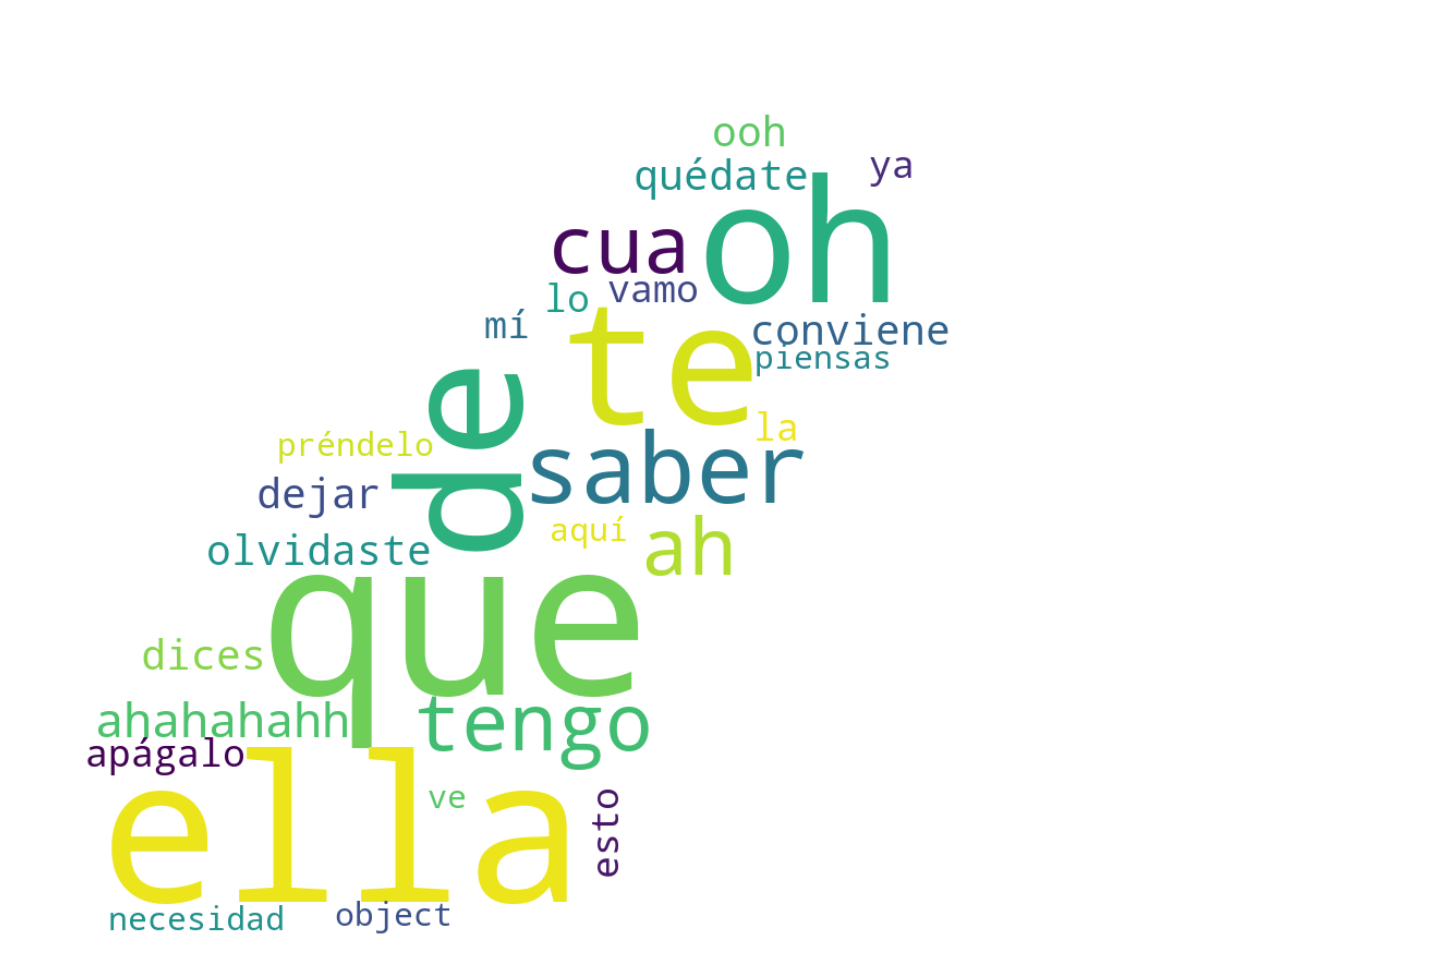

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
bird_mask = np.array(Image.open( "scarlet-macaw.jpg")) 
wordcloud = WordCloud(width=2000, height=1000, margin=0,
                        background_color="white",
                      stopwords=["Lyrics_clean", "PROPN", "VERB", "ADP", "PRON", "Name", "nouns", "dtype"],
                      mask=bird_mask
                     ).generate(str(df['Lyrics_clean']))
fig = plt.figure(
    figsize = (25, 25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

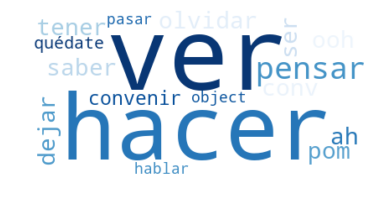

In [123]:
wordcloud = WordCloud(max_words=100, background_color="white",
                      stopwords=["NOUN", "PROPN", "VERB", "ADP", "PRON", "Name", "nouns", "dtype", "S", "verb_lemma"],
                      colormap="Blues"
                     ).generate(str(df['verb_lemma']))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

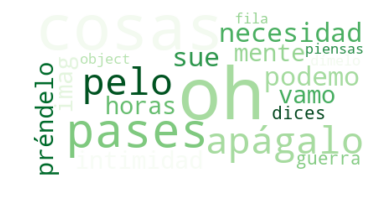

In [124]:
wordcloud = WordCloud(max_words=100, background_color="white",
                      stopwords=["NOUN", "PROPN", "VERB", "ADP", "PRON", "Name", "nouns", "dtype", "S"],
                      colormap="Greens"
                     ).generate(str(df['nouns']))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

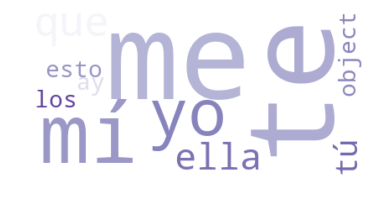

In [131]:
wordcloud = WordCloud(max_words=100, background_color="white",
                      stopwords=["NOUN", "PROPN", "VERB", "ADP", "PRON", "Name", "nouns", "dtype", "S", "pronoun"],
                      colormap="Purples"
                     ).generate(str(df['pronoun']))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

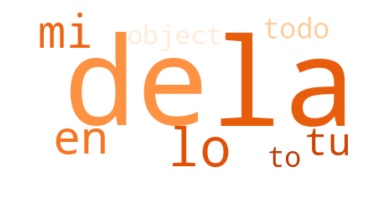

In [128]:
wordcloud = WordCloud(max_words=100, background_color="white",
                      stopwords=["NOUN", "PROPN", "VERB", "ADP", "PRON", "Name", "nouns", "dtype", "S", "stopwords"],
                      colormap="Oranges"
                     ).generate(str(df['stopwords']))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

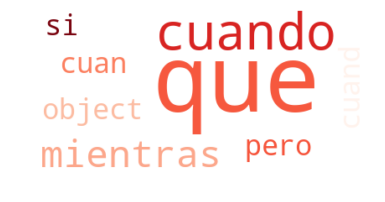

In [129]:
wordcloud = WordCloud(max_words=100, background_color="white",
                      stopwords=["NOUN", "PROPN", "VERB", "ADP", "PRON", "Name", "nouns", "dtype", "S", "conjs"],
                      colormap="Reds"
                     ).generate(str(df['conjs']))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

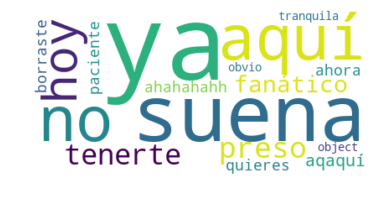

In [122]:
wordcloud = WordCloud(max_words=100, background_color="white",
                      stopwords=["NOUN", "PROPN", "VERB", "ADP", "PRON", "Name", "nouns", "dtype", "S", "ads"]
                     ).generate(str(df['ads']))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")